In [27]:
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf


In [28]:

def read_pgm(filename):
    """
    Reads a PGM file and returns the image data as a 2D list.
    """
    with open(filename, 'rb') as f:
        # Skip comments
        magic_number = f.readline().strip()
        if magic_number != b'P2':
            raise ValueError("Not a PGM file")
        while True:
            line = f.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break

        # Read the header
        width, height = map(int, line.split())
        max_val = int(f.readline())

        # Read the image data
        pixel_values = []
        for _ in range(height):
            row = map(int, f.readline().split())
            pixel_values.extend(row)
            
        max_value = max(pixel_values)
        # print(max_value)
         # Normalize pixel values to range [0, 1]
        pixel_values = [value / max_value for value in pixel_values]

        return pixel_values

def read_pgm_files_from_folder(folder_path):
    """
    Reads all PGM files from a folder and returns their data as a list of pixel value lists.
    """
    pgm_files_pixel_values = []
    for i, filename in enumerate(os.listdir(folder_path)):
        if filename.endswith('.pgm'):
            file_path = os.path.join(folder_path, filename)
            pixel_values = read_pgm(file_path)
            pgm_files_pixel_values.append(pixel_values)
    return pgm_files_pixel_values




In [29]:
# Example usage:
folder_path = 'Skullstriped2/t1_icbm_normal_1mm_pn3_rf20/pgm'
pgm_files_pixel_values = read_pgm_files_from_folder(folder_path)

# Access pixel values using different lists
for i, pixel_values in enumerate(pgm_files_pixel_values):
    locals()[f"original_pixel_values_{i}"] = pixel_values


In [30]:
import os

def read_pgm_mask(filename):
    """
    Reads a PGM file and returns the image data as a 2D list.
    """
    with open(filename, 'rb') as f:
        # Skip comments
        magic_number = f.readline().strip()
        if magic_number != b'P2':
            raise ValueError("Not a PGM file")
        while True:
            line = f.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break

        # Read the header
        width, height = map(int, line.split())
        max_val = int(f.readline())

        # Read the image data
        pixel_values = []
        for _ in range(height):
            row = map(int, f.readline().split())
            pixel_values.extend(row)
            
       # Convert pixel values greater than 3 to 0
        pixel_values = [0 if pixel > 3 else pixel for pixel in pixel_values]

        return pixel_values

def read_mask_pgm_files_from_folder(folder_path):
    """
    Reads all PGM files from a folder and returns their data as a list of pixel value lists.
    """
    pgm_files_pixel_values = []
    for i, filename in enumerate(os.listdir(folder_path)):
        if filename.endswith('.pgm'):
            file_path = os.path.join(folder_path, filename)
            pixel_values = read_pgm_mask(file_path)
            pgm_files_pixel_values.append(pixel_values)
    return pgm_files_pixel_values




In [31]:
# Example usage:
folder_path = 'volumes2\\phantom_1.0mm_normal_crisp'
pgm_files_pixel_values = read_mask_pgm_files_from_folder(folder_path)

# Access pixel values using different lists
for i, pixel_values in enumerate(pgm_files_pixel_values):
    locals()[f"mask_pixel_values_{i}"] = pixel_values
    


In [32]:
height = 217
width = 181

original = []
mask = []

for t in range(51):
    k = 0  # Reset the index for each file
    l = 0  # Reset the index for each file
    
    # Load pixel values for the current file
    train_pixel_values_t = locals().get(f'original_pixel_values_{t}', None)
    if train_pixel_values_t is None:
        continue  # Skip if data for current file is not found
    
    # Load mask pixel values for the current file
    train_mask_pixel_values_t = locals().get(f'mask_pixel_values_{t}', None)
    if train_mask_pixel_values_t is None:
        continue  # Skip if data for current file is not found
    
    for i in range(width):
        for j in range(height):
            rows = []
            rows.append(train_pixel_values_t[k])
            original.append(rows)
            k += 1
            
    for i in range(width):
        for j in range(height):
            mask.append(train_mask_pixel_values_t[l])
            l += 1
            
print(len(original))
print(len(mask))

print(original[10000:10100])
print(mask[10000:10100])

2003127
2003127
[[0.7857142857142857], [0.7662337662337663], [0.7727272727272727], [0.5974025974025974], [0.6883116883116883], [0.7077922077922078], [0.6558441558441559], [0.7142857142857143], [0.8506493506493507], [0.8636363636363636], [0.7662337662337663], [0.8571428571428571], [0.8311688311688312], [0.8051948051948052], [0.7727272727272727], [0.6948051948051948], [0.6233766233766234], [0.6298701298701299], [0.6818181818181818], [0.6233766233766234], [0.6558441558441559], [0.7207792207792207], [0.7792207792207793], [0.8181818181818182], [0.8441558441558441], [0.8506493506493507], [0.8506493506493507], [0.8571428571428571], [0.7857142857142857], [0.6688311688311688], [0.6298701298701299], [0.6233766233766234], [0.487012987012987], [0.35064935064935066], [0.34415584415584416], [0.35714285714285715], [0.43506493506493504], [0.2922077922077922], [0.045454545454545456], [0.05194805194805195], [0.2597402597402597], [0.43506493506493504], [0.525974025974026], [0.5974025974025974], [0.525974

In [33]:
scaler = StandardScaler()
original_scaled = scaler.fit_transform(original)


In [34]:
import numpy as np
original=np.array(original_scaled)
mask=np.array(mask)

print(original)
print(mask)

[[-0.90514709]
 [-0.90514709]
 [-0.90514709]
 ...
 [-0.90514709]
 [-0.90514709]
 [-0.90514709]]
[0 0 0 ... 0 0 0]


In [36]:
from sklearn.model_selection import train_test_split

# Assuming your data is stored in numpy arrays 'original_pixels' (X) and 'ground_truth_pixels' (Y)

# Step 1: Shuffle the Dataset
indices = np.arange(original.shape[0])
np.random.shuffle(indices)

shuffled_original_pixels = original[indices]
shuffled_ground_truth_pixels = mask[indices]

# Step 2: Split the Dataset
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(shuffled_original_pixels, shuffled_ground_truth_pixels, test_size=test_ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio))

# Now you have X_train, X_val, X_test, Y_train, Y_val, and Y_test ready


In [38]:
X_train.shape


(1201875, 1)

In [39]:
X_val.shape

(400626, 1)

In [40]:
X_test.shape

(400626, 1)

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np

# Define the RBF activation function
def rbf(x, beta, centers):
    return tf.exp(-beta * tf.reduce_sum((tf.expand_dims(x, axis=1) - centers)**2, axis=2))

# Define the RBF layer
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, beta_initializer='uniform', **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.beta_initializer = beta_initializer
        
    def build(self, input_shape):
        self.centers = self.add_weight(name='centers', shape=(self.units, input_shape[1]),
                                        initializer='uniform', trainable=True)
        self.beta = self.add_weight(name='beta', shape=(self.units,),
                                    initializer=self.beta_initializer, trainable=True)
        
    def call(self, inputs):
        return rbf(inputs, self.beta, self.centers)

# Define the RBF neural network model
model = tf.keras.Sequential([
    Dense(4, activation='softmax', input_shape=(X_train.shape[1],)), # Input layer
    RBFLayer(10),  # RBF hidden layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss = model.evaluate(X_test, y_test)


c:\Users\Shruti Pathak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 110s 3ms/step - loss: 0.6617 - val_loss: 0.3759
Epoch 2/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 129s 3ms/step - loss: 0.3789 - val_loss: 0.3794
Epoch 3/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 117s 3ms/step - loss: 0.3759 - val_loss: 0.3716
Epoch 4/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 121s 3ms/step - loss: 0.3752 - val_loss: 0.3716
Epoch 5/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 102s 3ms/step - loss: 0.3731 - val_loss: 0.3690
Epoch 6/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 102s 3ms/step - loss: 0.3709 - val_loss: 0.3691
Epoch 7/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 143s 3ms/step - loss: 0.3707 - val_loss: 0.3680
Epoch 8/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - loss: 0.3711 - val_loss: 0.3686
Epoch 9/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 101s 3ms/step - loss: 0.3693 - val_loss: 0.3679
Epoch 10/10
37559/37559 ━━━━━━━━━━━━━━━━━━━━ 101s 3ms/step - loss: 0.3695 - val_loss: 0.3685
12520/12520 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.3699


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)



12520/12520 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step
Mean Absolute Error (MAE): 0.36955035996545504
Root Mean Squared Error (RMSE): 0.6068269311562946


c:\Users\Shruti Pathak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
print(y_pred)

[[2.1866155]
 [2.0599592]
 [2.5236688]
 ...
 [1.9759718]
 [0.047481 ]
 [0.047481 ]]


In [44]:
with open('y_pred.txt', 'w') as f:
    for i in y_pred:

        print(i,file=f)


In [45]:
y_pred.shape


(400626, 1)

In [46]:
from sklearn.metrics import accuracy_score

# Round the predictions to the nearest integer to get the predicted class
y_pred_class = np.round(y_pred).astype(int)

# Convert the ground truth labels to integer format if necessary
y_true_class = y_test.astype(int)

# Calculate accuracy score
accuracy = accuracy_score(y_true_class, y_pred_class)
print("Accuracy Score:", accuracy)



Accuracy Score: 0.7272718196023223


In [47]:
print(y_pred_class)

[[2]
 [2]
 [3]
 ...
 [2]
 [0]
 [0]]


In [49]:
with open('y_pred2.txt', 'w') as file:
    for i in y_pred_class:

        print(i,file=file)

In [48]:
csf_test=[]
csf_pred=[]

for i in range(len(y_true_class)):
    if(y_true_class[i]==1):
        csf_test.append(y_true_class[i])
        csf_pred.append(y_pred_class[i])

accuracy = accuracy_score(csf_test, csf_pred)
print("CSF Accuracy:", accuracy)

CSF Accuracy: 0.051876338229217535


In [50]:
gm_test=[]
gm_pred=[]

for i in range(len(y_true_class)):
    if(y_true_class[i]==2):
        gm_test.append(y_true_class[i])
        gm_pred.append(y_pred_class[i])

accuracy = accuracy_score(gm_test, gm_pred)
print("GM Accuracy:", accuracy)

GM Accuracy: 0.6661686926978543


In [51]:
wm_test=[]
wm_pred=[]

for i in range(len(y_true_class)):
    if(y_true_class[i]==3):
        wm_test.append(y_true_class[i])
        wm_pred.append(y_pred_class[i])

accuracy = accuracy_score(wm_test, wm_pred)
print("WM Accuracy:", accuracy)

WM Accuracy: 0.46570996978851964


In [66]:
print(classification_report(y_true_class,y_pred_class,digits=4))

              precision    recall  f1-score   support

           0     0.9625    0.9801    0.9712    216451
           1     0.7471    0.5975    0.6640     30189
           2     0.8463    0.7917    0.8181     94366
           3     0.8328    0.9076    0.8686     91041

    accuracy                         0.8969    432047
   macro avg     0.8472    0.8192    0.8305    432047
weighted avg     0.8947    0.8969    0.8947    432047



In [67]:
import numpy as np

def dice(y_true, y_pred, class_id):

    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Filter true and predicted labels for the specified class
    true_mask = (y_true == class_id)
    pred_mask = (y_pred == class_id)

    # Compute Dice coefficient for each sample
    dice_values = []
    for true_sample, pred_sample in zip(true_mask, pred_mask):
        intersection_count = np.sum(true_sample & pred_sample)
        true_count = np.sum(true_sample)
        pred_count = np.sum(pred_sample)

        # Compute Dice coefficient for the sample
        if true_count + pred_count == 0:
            dice_values.append(1.0)  # Handle case where both masks are empty
        else:
            dice_values.append(2. * intersection_count / (true_count + pred_count))

    # Compute average Dice coefficient
    return np.mean(dice_values)



In [78]:
# Example usage:
# Assuming y_true_class and y_pred_class are arrays containing class labels
class_ids = [0, 1, 2, 3]  # Assuming class IDs range from 0 to 3

for class_id in class_ids:
    class_dice = dice(y_true_class, y_pred_class, class_id)
    print(f"Dice coefficient for class {class_id}: {class_dice}")


Dice coefficient for class 0: 0.9712058124017131
Dice coefficient for class 1: 0.66401634365855
Dice coefficient for class 2: 0.8180658442973451
Dice coefficient for class 3: 0.868552867407061


In [77]:
def dice(im1,im2,cl):
    tp=0
    fp=0
    fn=0
    for i in range(len(im1)):
        if(im1[i]==cl and im2[i]==cl):
            tp+=1
        if(im1[i]==cl):
            fn+=1
        if(im2[i]==cl):
            fp+=1
    return (2*tp/(fp+fn))

dice(y_true_class,y_pred_class,3)


0.868552867407061

In [79]:
def read_pgm_normalized(filename):
    """
    Reads a PGM file and returns the image data as a 2D list.
    """
    with open(filename, 'rb') as f:
        # Skip comments
        magic_number = f.readline().strip()
        if magic_number != b'P2':
            raise ValueError("Not a PGM file")
        while True:
            line = f.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break

        # Read the header
        width, height = map(int, line.split())
        max_val = int(f.readline())

        # Read the image data
        pixel_values = []
        for _ in range(height):
            row = map(int, f.readline().split())
            pixel_values.extend(row)
            
        max_value = max(pixel_values)
        print(max_value)
         # Normalize pixel values to range [0, 1]
        pixel_values = [value / max_value for value in pixel_values]

        return pixel_values

# Example usage:
# filename = 'Extracted_files\\pgm\\t1_icbm_normal_1mm_pn0_rf0\\slice_92.pgm'
filename = 'Skullstriped2\\t1_icbm_normal_1mm_pn0_rf0\\test\\slice_61.pgm'
pixel_values_original = read_pgm_normalized(filename)

print(pixel_values_original)
print(max(pixel_values_original))

159
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [80]:
def read_pgm(filename):
    """
    Reads a PGM file and returns the image data as a 2D list.
    """
    with open(filename, 'rb') as f:
        # Skip comments
        magic_number = f.readline().strip()
        if magic_number != b'P2':
            raise ValueError("Not a PGM file")
        while True:
            line = f.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break

        # Read the header
        width, height = map(int, line.split())
        max_val = int(f.readline())

        # Read the image data
        pixel_values = []
        for _ in range(height):
            row = map(int, f.readline().split())
            pixel_values.extend(row)
            
        # Convert pixel values greater than 3 to 0
        pixel_values = [0 if pixel > 3 else pixel for pixel in pixel_values]

        return pixel_values

filename_mask='Extracted_files\\pgm\\phantom_1.0mm_normal_crisp\\slice_61.pgm'
pixel_values_mask = read_pgm(filename_mask)

print(pixel_values_mask)
print(max(pixel_values_mask))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [81]:
height = 217
width = 181


In [82]:
import matplotlib.pyplot as plt

def convert_to_2d_list(lst, rows, cols):
    if len(lst) != rows * cols:
        raise ValueError("Length of the 1D list does not match the specified dimensions of the 2D list.")
    #print(rows)
    #print(cols)
    return [lst[i*cols:(i+1)*cols] for i in range(rows)]

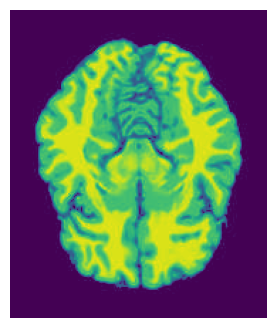

In [83]:
original = convert_to_2d_list(pixel_values_original, height, width)
plt.figure(figsize=(4, 4))  # Set the size of the figure
plt.axis('off')  # Turn off the axis
plt.imshow(original)

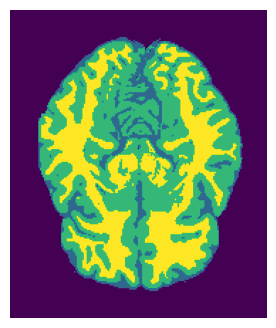

In [84]:
mask = convert_to_2d_list(pixel_values_mask, height, width)
plt.figure(figsize=(4, 4))  # Set the size of the figure
plt.axis('off')  # Turn off the axis
plt.imshow(mask)

In [85]:

X_test=[]
k=0
for i in range(width):
    for j in range(height):
        rows=[]
        rows.append(pixel_values_original[k])
        X_test.append(rows)
        k+=1
        
        
y_test=[]
k=0
for i in range(width):
    for j in range(height):
        y_test.append(pixel_values_mask[k])
        k+=1
scaler = StandardScaler() 
scaler.fit(X_test)
       
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)
print(y_test)

[[-0.95015353]
 [-0.95015353]
 [-0.95015353]
 ...
 [-0.95015353]
 [-0.95015353]
 [-0.95015353]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [88]:
X_test=np.array(X_test_scaled)
y_test=np.array(y_test)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)



1228/1228 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step
Mean Absolute Error (MAE): 0.1836772793181927
Root Mean Squared Error (RMSE): 0.24520844214297655


c:\Users\jksing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [90]:
from sklearn.metrics import accuracy_score

# Round the predictions to the nearest integer to get the predicted class
y_pred_class = np.round(y_pred).astype(int)

# Convert the ground truth labels to integer format if necessary
y_true_class = y_test.astype(int)

# Calculate accuracy score
accuracy = accuracy_score(y_true_class, y_pred_class)
print("Accuracy Score:", accuracy)



Accuracy Score: 0.953407846831479


In [91]:
ori_csf=[]
pred_csf=[]

for i in y_true_class:
    if(i==1):
        ori_csf.append(255)
    else:
        ori_csf.append(0)

for i in y_pred_class:
    if(i==1):
        pred_csf.append(255)
    else:
        pred_csf.append(0)

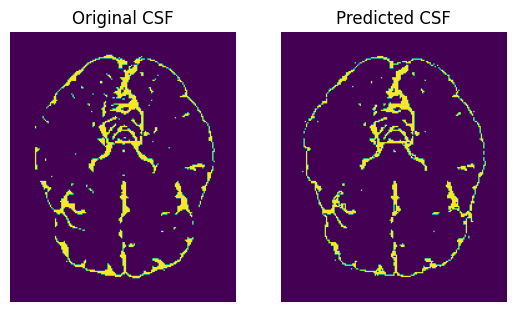

In [92]:
original_csf = convert_to_2d_list(ori_csf, height, width)
predicted_csf = convert_to_2d_list(pred_csf, height, width)

# Plotting original image
plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, and this being the first subplot
plt.imshow(original_csf)
plt.title('Original CSF')
plt.axis('off')

# Plotting predicted image
plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, and this being the second subplot
plt.imshow(predicted_csf)
plt.title('Predicted CSF')
plt.axis('off')
# Save the plot
plt.savefig('original_csf_vs_predicted_csf.png')


plt.show()

In [93]:
ori_gm=[]
pred_gm=[]

for i in y_true_class:
    if(i==2):
        ori_gm.append(255)
    else:
        ori_gm.append(0)

for i in y_pred_class:
    if(i==2):
        pred_gm.append(255)
    else:
        pred_gm.append(0)

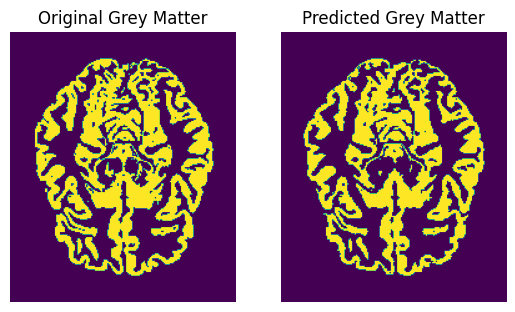

In [94]:
original_gm = convert_to_2d_list(ori_gm, height, width)
predicted_gm = convert_to_2d_list(pred_gm, height, width)

# Plotting original image
plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, and this being the first subplot
plt.imshow(original_gm)
plt.title('Original Grey Matter')
plt.axis('off')

# Plotting predicted image
plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, and this being the second subplot
plt.imshow(predicted_gm)
plt.title('Predicted Grey Matter')
plt.axis('off')
# Save the plot
plt.savefig('original_gm_vs_predicted_gm.png')


plt.show()


In [97]:
ori_wm=[]
pred_wm=[]

for i in y_true_class:
    if(i==3):
        ori_wm.append(255)
    else:
        ori_wm.append(0)

for i in y_pred_class:
    if(i==3):
        pred_wm.append(255)
    else:
        pred_wm.append(0)

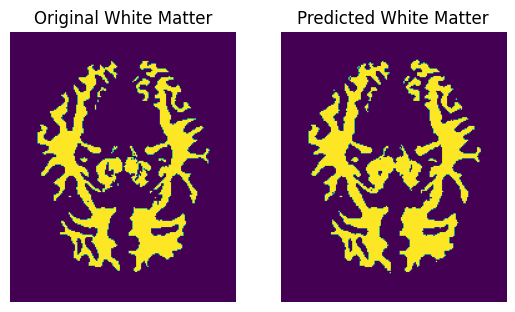

In [98]:
original_wm = convert_to_2d_list(ori_wm, height, width)
predicted_wm = convert_to_2d_list(pred_wm, height, width)

# Plotting original image
plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, and this being the first subplot
plt.imshow(original_wm)
plt.title('Original White Matter')
plt.axis('off')

# Plotting predicted image
plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, and this being the second subplot
plt.imshow(predicted_wm)
plt.title('Predicted White Matter')
plt.axis('off')
# Save the plot
plt.savefig('original_wm_vs_predicted_wm.png')

plt.show()
